In [2]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, accuracy_score, f1_score, matthews_corrcoef
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
X = data.data

In [6]:
y = data.target

In [7]:
X.shape, y.shape

((569, 30), (569,))

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
model = SVC(probability=True, kernel = 'linear', verbose=True)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.35)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((369, 30), (200, 30), (369,), (200,))

In [12]:
model.fit(x_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

In [13]:
y_pred = model.predict(x_test)

In [14]:
y_proba = model.predict_proba(x_test)

In [15]:
np.unique(y_test)

array([0, 1])

In [16]:
y_proba = y_proba[:, 1]

In [17]:
conf = confusion_matrix(y_test, y_pred, labels = [1, 0])
conf

array([[133,   3],
       [  5,  59]], dtype=int64)

In [18]:
TP, FN, FP, TN = conf.ravel()

In [19]:
TP, FN, FP, TN

(133, 3, 5, 59)

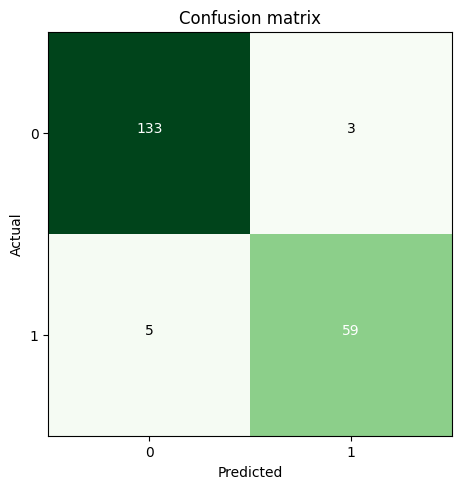

In [20]:
plt.imshow(conf, interpolation='nearest', cmap = plt.cm.Greens)
plt.title("Confusion matrix")
plt.xticks([0, 1])
plt.yticks([0, 1])
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        plt.text(j, i, format(conf[i, j]), ha='center', color='white' if i==j else 'black')
plt.tight_layout()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

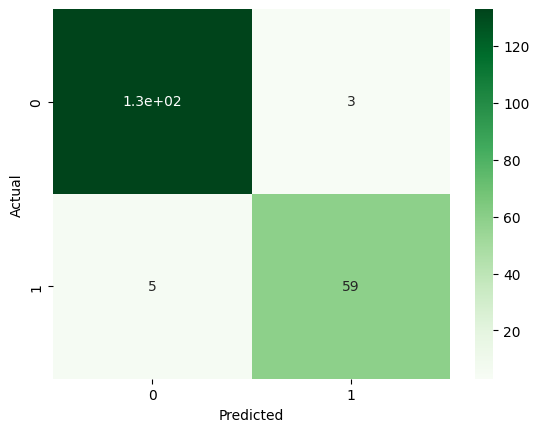

In [21]:
import seaborn as sn
sn.heatmap(conf, annot=True, cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

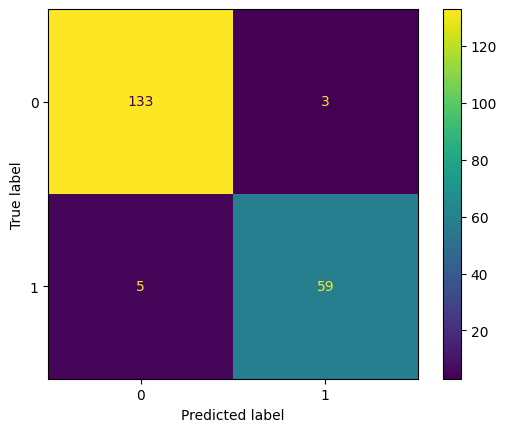

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()
plt.show()

In [24]:
result = {}

In [25]:
result['accuracy'] = (TP+TN)/(TP+TN+FP+FN)
result['accuracy']

0.96

In [26]:
result['precision'] = TP/(TP+FP)
result['precision']

0.9637681159420289

In [27]:
result['recall'] = TP/(TP+FN)
result['recall']

0.9779411764705882

In [28]:
result['f1score'] = 2/((1/result['precision'])+(1/result['recall']))
result['f1score']

0.9708029197080292

In [29]:
num = TP*TN-FP*FN
den = ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**0.5
result['mcc'] = num/den
result['mcc']

0.9075652310888469

In [30]:
result['specificity'] = TN/(TN+FP)
result['specificity']

0.921875

In [31]:
result['npv'] = TN/(TN+FN)
result['npv']

0.9516129032258065

In [32]:
result

{'accuracy': 0.96,
 'precision': 0.9637681159420289,
 'recall': 0.9779411764705882,
 'f1score': 0.9708029197080292,
 'mcc': 0.9075652310888469,
 'specificity': 0.921875,
 'npv': 0.9516129032258065}

In [33]:
print(f"accuracy = {accuracy_score(y_test, y_pred)}")
print(f"precision = {precision_score(y_test, y_pred)}")
print(f"recall = {recall_score(y_test, y_pred)}")
print(f"f1score = {f1_score(y_test, y_pred)}")
print(f"MCC = {matthews_corrcoef(y_test, y_pred)}")
print(f"Specificity = {recall_score(y_test, y_pred, pos_label=0)}")
print(f"npv = {precision_score(y_test, y_pred, pos_label=0)}")

accuracy = 0.96
precision = 0.9637681159420289
recall = 0.9779411764705882
f1score = 0.9708029197080291
MCC = 0.9075652310888469
Specificity = 0.921875
npv = 0.9516129032258065


In [34]:
FPR, TPR, _ = roc_curve(y_test, y_proba)

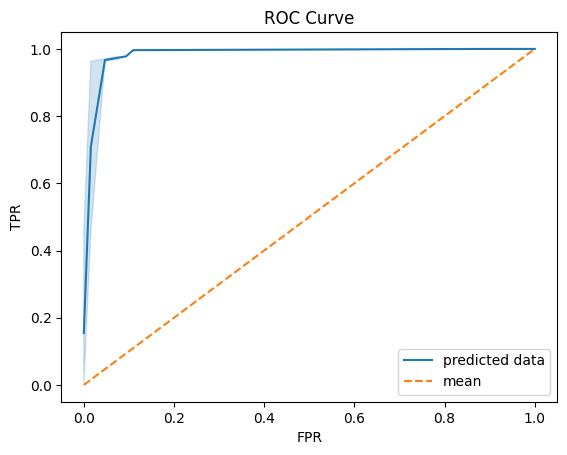

In [35]:
sn.lineplot(x = FPR, y = TPR, label='predicted data')
sn.lineplot(x = [0,1], y=[0,1], linestyle='--', label='mean')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [36]:
rand_proba = np.random.random(size=(y_proba.shape))
FPR, TPR, _ = roc_curve(y_test, rand_proba)

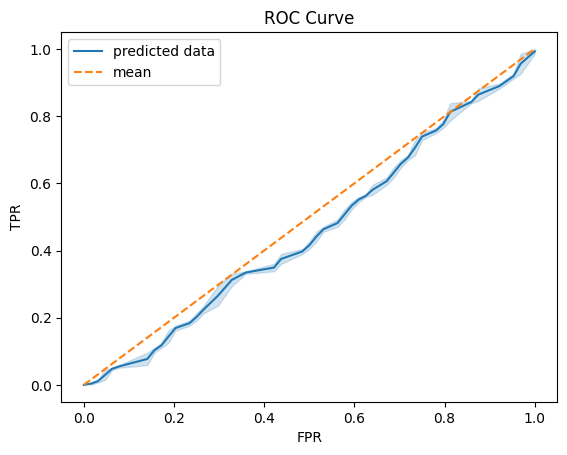

In [37]:
sn.lineplot(x = FPR, y = TPR, label='predicted data')
sn.lineplot(x = [0,1], y=[0,1], linestyle='--', label='mean')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [38]:
roc_auc_score(y_test, y_proba)

0.9888556985294118

In [39]:
roc_auc_score(y_test, rand_proba)

0.45967371323529416